In [1]:
import pandas as pd

# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('penguins.csv').dropna()

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size
for i in range(1,3):
    penguins = penguins.append(penguins)

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

C:\Users\saika\AppData\Local\Temp\ipykernel_6176\2070975810.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)
C:\Users\saika\AppData\Local\Temp\ipykernel_6176\2070975810.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
102,37.7,16.0,18.3,30.75,0
115,42.7,18.3,19.6,40.75,0
227,48.6,16.0,23.0,58.00,1
269,48.8,16.2,22.2,60.00,1
182,47.3,15.3,22.2,52.50,1
82,36.7,18.8,18.7,38.00,0
249,46.9,14.6,22.2,48.75,1
94,36.2,17.3,18.7,33.00,0
338,45.7,17.0,19.5,36.50,2
238,43.4,14.4,21.8,46.00,1


In [2]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 38.1 17.0 18.1 31.75 0 ] Adelie
[ 38.1 18.6 19.0 37.0 0 ] Adelie
[ 42.6 13.7 21.3 49.5 1 ] Gentoo
[ 45.8 14.6 21.0 42.0 1 ] Gentoo
[ 37.6 17.0 18.5 36.0 0 ] Adelie
[ 51.9 19.5 20.6 39.5 2 ] Chinstrap
[ 50.8 17.3 22.8 56.0 1 ] Gentoo
[ 52.0 18.1 20.1 40.5 2 ] Chinstrap
[ 39.2 21.1 19.6 41.5 0 ] Adelie
[ 49.0 16.1 21.6 55.5 1 ] Gentoo


In [3]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

D:\SOFTWRAES\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


In [4]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
  Using cached grpcio-1.63.0-cp39-cp39-win_amd64.whl (3.9 MB)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-win_amd64.whl (127 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Su

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 3.3.3
TensorFlow version: 2.16.1


In [6]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


In [7]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())

D:\SOFTWRAES\anaconda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4944 - loss: 2.3950 - val_accuracy: 0.7981 - val_loss: 0.7245
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8710 - loss: 0.6390 - val_accuracy: 0.9635 - val_loss: 0.4294
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9670 - loss: 0.3774 - val_accuracy: 0.9927 - val_loss: 0.3242
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9765 - loss: 0.2829 - val_accuracy: 0.9927 - val_loss: 0.2543
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.2205 - val_accuracy: 0.9951 - val_loss: 0.2042
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.1765 - val_accuracy: 0.9951 - val_loss: 0.1679
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.1450 - val_accuracy: 0.9951 - val_loss: 0.1410
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.1220 - val_accuracy: 0.9927 - val_loss:

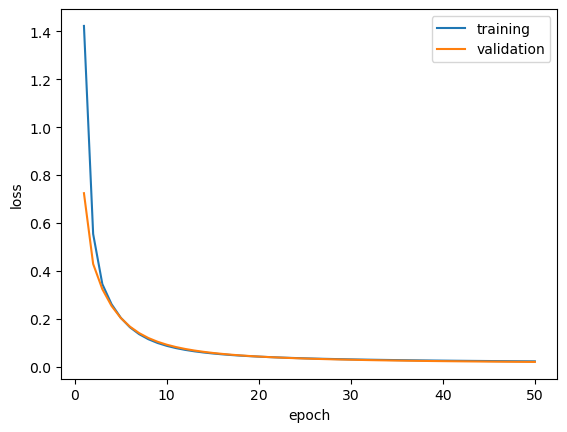

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [11]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[ 0.661172    0.30352542  0.5198189   0.2003426   0.1479671  -0.19277616
  -0.4876929  -0.3580131  -0.01817852  0.33575273]
 [-0.5245161   0.30650067  0.07799104  0.5847995   0.02894068  0.5407023
  -0.14699048  0.6248771  -0.71874505 -0.2505676 ]
 [-0.5592639  -0.1430972   0.1959833  -0.62663     0.34949124  0.4720308
   0.14132953  0.47158027  0.0836449   0.3300411 ]
 [-0.14463325 -0.18994984  0.28430936 -0.6246994  -0.48274994  0.1810818
   0.23119026 -0.49185932  0.38644692 -0.56854725]] 
Biases:
 [-0.05130438 -0.05596417 -0.01086838  0.          0.          0.1080891
  0.          0.         -0.0269444  -0.07902349]
------------
Weights:
 [[-0.7613409   0.09447658  0.20848316 -0.05019163 -0.02814519  0.10596293
   1.3250384   0.7852093  -0.5266235   0.3989777 ]
 [-0.68615806 -0.37843436 -0.28959236  0.0238385   0.05103427 -0.5233571
  -0.07389233  0.4078704   0.32540852 -0.19565481]
 [ 0.29153082 -0.38697034 -0.26712495  0.4323531  -0.2927882  -0.36982983
 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


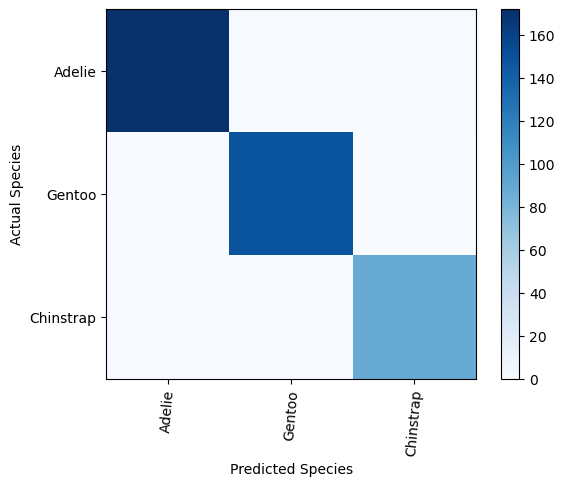

In [12]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [13]:
# Save the trained model
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/penguin-classifier.h5


In [14]:
# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Gentoo
